In [4]:
import pandas as pd #read the dataset
import numpy as np #numerical python
import matplotlib.pyplot as plt #Plot the Graph
import seaborn as sns #plot gaphical

In [6]:
#read the dataset
df = pd.read_csv('diabetes.csv')

In [7]:
df.head(5) #to disply a ouput first five 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
731,8,120,86,0,0,28.4,0.259,22,1
579,2,197,70,99,0,34.7,0.575,62,1
202,0,108,68,20,0,27.3,0.787,32,0
556,1,97,70,40,0,38.1,0.218,30,0
548,1,164,82,43,67,32.8,0.341,50,0


Outcome
0    500
1    268
Name: count, dtype: int64


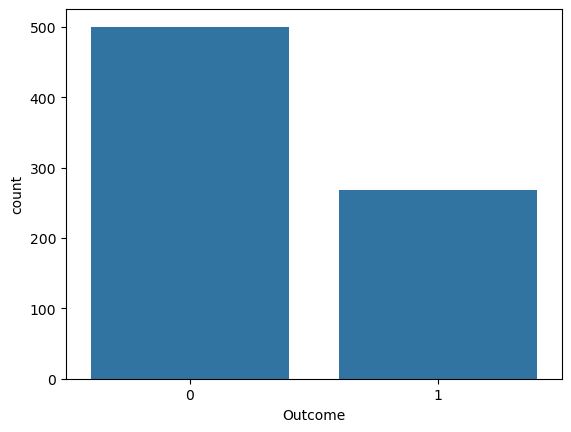

In [9]:
sns.countplot(x= 'Outcome', data =df)
print(df['Outcome'].value_counts())

<Axes: xlabel='Outcome', ylabel='count'>

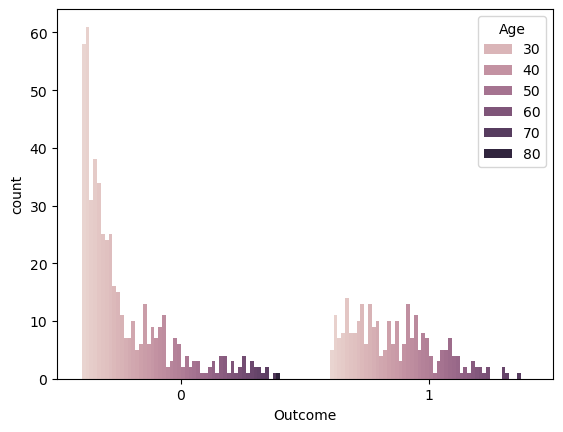

In [10]:
sns.countplot(x= 'Outcome', hue = 'Age', data =df)
# print(df['Age'].value_counts())

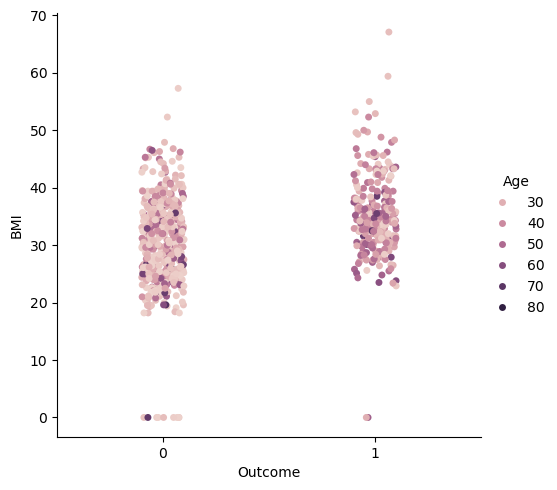

In [11]:
sns.catplot(x= 'Outcome', y = 'BMI', hue = 'Age', data =df)

<Axes: xlabel='Outcome', ylabel='count'>

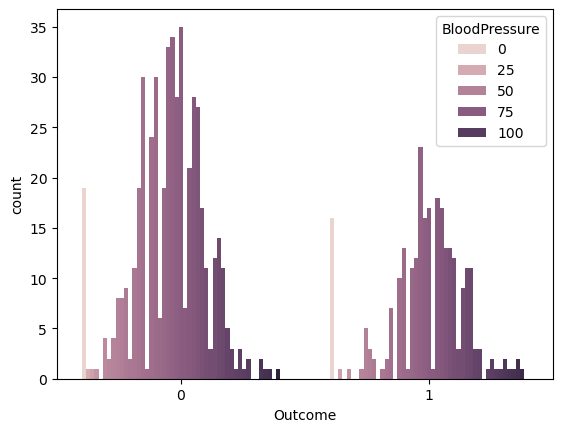

In [12]:
sns.countplot(x= 'Outcome', hue = 'BloodPressure', data =df)

C:\Users\guru\AppData\Local\Temp\ipykernel_17312\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

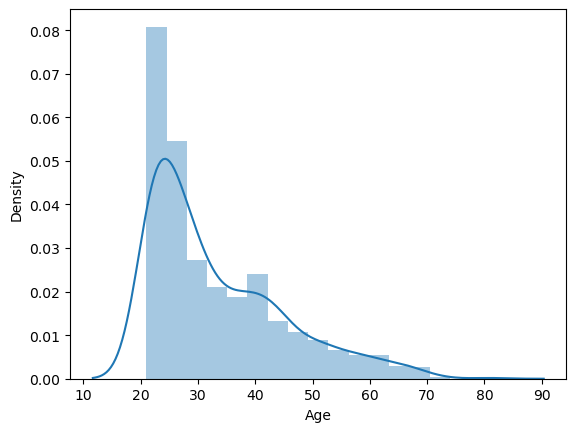

In [14]:
sns.distplot(df['Age'])

#Aim : to predict weather diabetes have or not

In [34]:
df.shape #how many rows and column

(768, 9)

In [35]:
df.info() #see the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
df.isnull().sum() #to check the null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Train and Test

In [38]:
from sklearn.model_selection import train_test_split #data #label

In [39]:
x = df.iloc[:,df.columns!='Outcome'] #data
y = df.iloc[:,df.columns=='Outcome'] #outcome or Label

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2) #20%test 

# Algorithm

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model= RandomForestClassifier()

In [88]:
model.fit(xtrain,ytrain.values.ravel()) #to train the alg

RandomForestClassifier()

In [89]:
predict_output = model.predict(xtest) #to test the alg
print(predict_output)

[0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 1 1 0 0 0]


In [90]:
from sklearn.metrics import accuracy_score

In [91]:
acc=accuracy_score(predict_output,ytest)
print('The accuracy score for RF:',acc)

The accuracy score for RF: 0.7857142857142857
